# Introduction

##### HELP International is a global humanitarian NGO committed to alleviating poverty and providing essential services to people in underdeveloped countries, especially during times of disaster and calamity. Recently, the organization has raised $10 million in funds, and the CEO is faced with the critical decision of determining how to allocate these funds most effectively. The goal is to identify the countries in the direst need of aid based on their socio-economic and health conditions.

### Objective
##### The primary objective of this project is to use unsupervised learning techniques to categorize countries based on socio-economic and health factors. By grouping countries with similar characteristics, we can identify clusters of countries that are in the most need of aid. The analysis will 

## Data 


#### **Dataset Overview**

The dataset used in this project contains socio-economic and health indicators for various countries around the world. The data includes several key features that are indicative of a country's overall development. Below is a description of each feature in the dataset:

- **country**: Name of the country.
- **child_mort**: Death of children under 5 years of age per 1000 live births.
- **exports**: Exports of goods and services per capita. Given as a percentage of the GDP per capita.
- **health**: Total health spending per capita. Given as a percentage of GDP per capita.
- **imports**: Imports of goods and services per capita. Given as a percentage of the GDP per capita.
- **Income**: Net income per person.
- **Inflation**: The measurement of the annual growth rate of the total GDP.
- **life_expec**: The average number of years a newborn child would live if the current mortality patterns are to remain the same.
- **total_fer**: The number of children that would be born to each woman if the current age-fertility rates remain the same.
- **gdpp**: The GDP per capita. Calculated as the total GDP divided by the toerent countries.


## Initial Data Inspection

The first step is to load the dataset and examine the first few rows to get a sense of what the data looks like. 


In [1]:
import pandas as pd
import numpy as np
import warnings
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

# Suppressing warnings from python since it clutters my outputs.
warnings.filterwarnings('ignore')

In [2]:
country_df = pd.read_csv(r"C:\Users\turtl\Downloads\countryData\Country-data.csv")

In [3]:
country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


We will also check for any missing values, which could impact the analysis, and ensure that all data types are appropriate for the analysis we plan to conduct.


In [4]:
# Check for missing values
missing_values = country_df.isnull().sum()
print("Missing values in each column:\n", missing_values)

# Display basic statistics of the dataset
country_df.describe()

Missing values in each column:
 country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


## Exploratory Data Analysis (EDA)


## Univariate Analysis

In this section, we will analyze the distribution of each feature individually to understand the data better. This includes examining the central tendency, spread, and any potential outliers in the data.


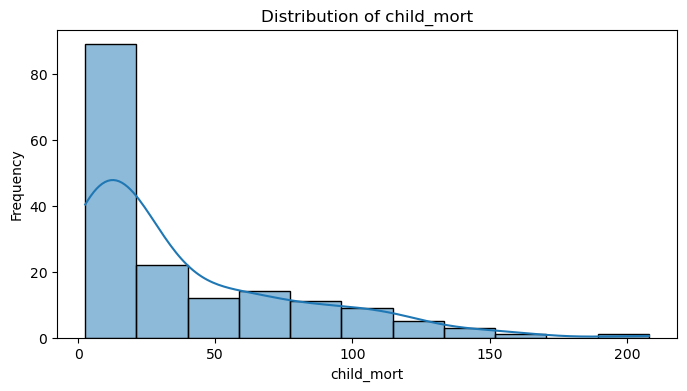

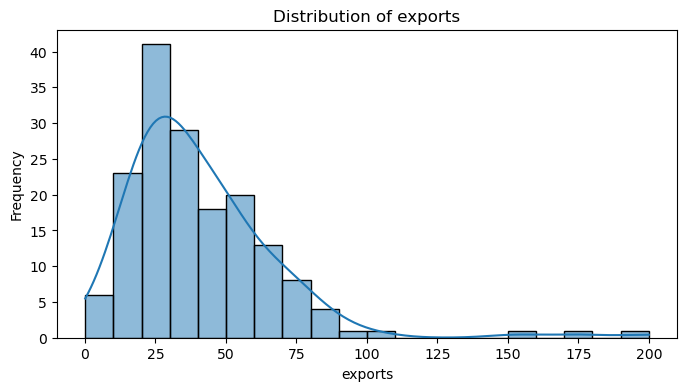

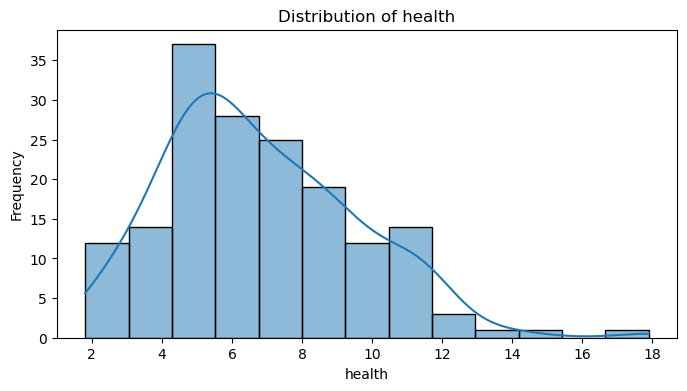

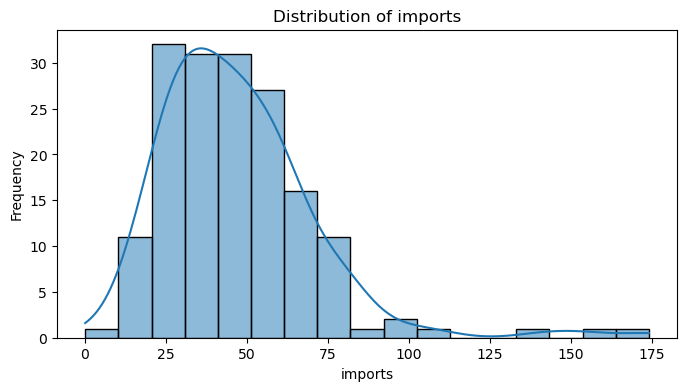

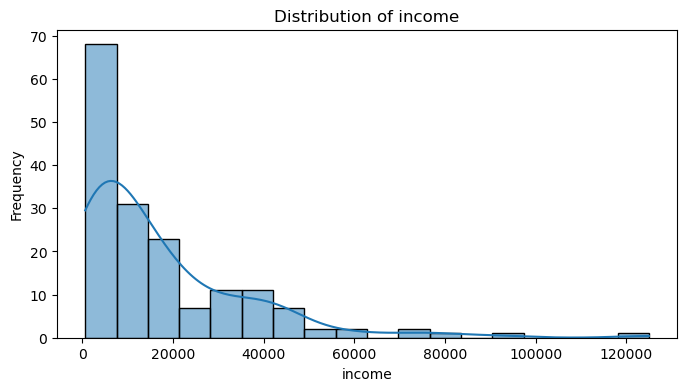

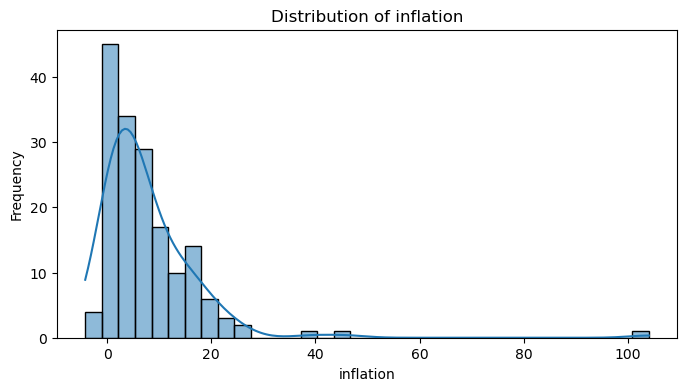

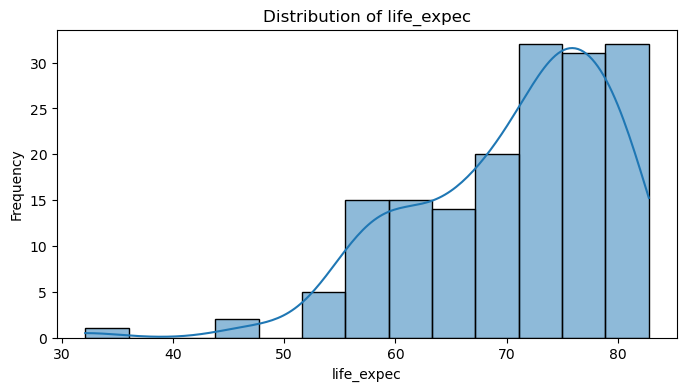

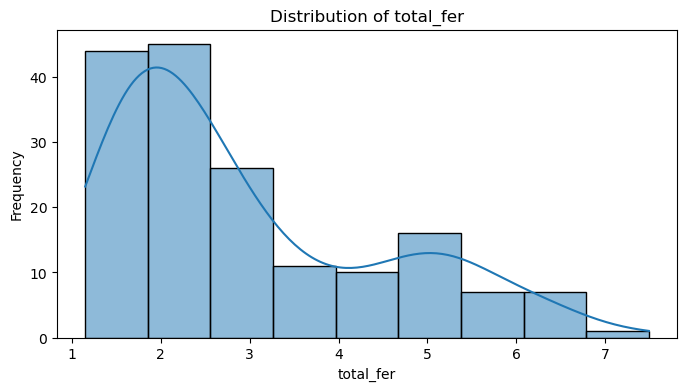

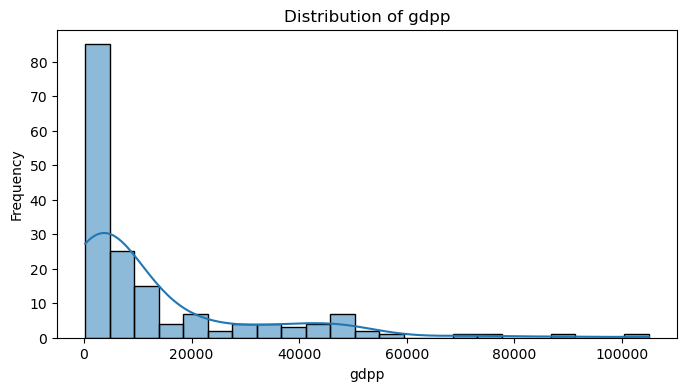

In [5]:
columns = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']

for col in columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(country_df[col].dropna(), kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

In [6]:
# Calculate Z-scores
z_scores = np.abs(stats.zscore(country_df[columns].dropna()))

# Define a threshold to identify outliers
threshold = 3
outliers = np.where(z_scores > threshold)

print("Outliers detected at the following positions:\n", outliers)

Outliers detected at the following positions:
 (array([ 23,  66,  66,  82,  91,  91,  91,  91,  98,  98, 112, 113, 114,
       123, 123, 132, 133, 133, 145, 159, 163], dtype=int64), array([4, 0, 6, 4, 1, 3, 4, 8, 1, 3, 7, 5, 8, 4, 8, 0, 1, 3, 8, 2, 5],
      dtype=int64))


In [7]:
df_cleaned = country_df[(z_scores < threshold).all(axis=1)]

print("Original data shape:", country_df.shape)
print("Cleaned data shape:", df_cleaned.shape)

Original data shape: (167, 10)
Cleaned data shape: (153, 10)


## Data Preprocessing

### Handling Outliers

Outliers are extreme values that deviate significantly from the rest of the data. In the context of clustering, outliers can have a substantial impact on the results. They may distort the formation of clusters, leading to inaccurate or misleading conclusions. Therefore, it was essential to identify and handle the outliers before proceeding with the clustering analysis.

#### Why Remove Outliers?

- **Impact on Clustering Algorithms:** Clustering algorithms like K-means aim to minimize the distance between data points and cluster centroids. Outliers can disproportionately influence the centroid positions, leading to suboptimal cluster formation.

- **Improved Model Performance:** By removing outliers, we can improve the quality of the clusters formed. The algorithm will focus on the general trends and patterns in the data rather than being skewed by a few extreme values.

- **Better Interpretability:** Outlier removal helps in achieving more meaningful and interpretable clusters. The resulting groups will better represent the general characteristics of the data, making it easier to derive actionable insights.

Now that outliers have been handled, we proceed with feature scaling.


### Feature Scaling

After removing the outliers, we need to scale the features to ensure they are on the same scale. Clustering algorithms like K-means are sensitive to the scale of data, and features with larger ranges can disproportionately influence the clustering results. Therefore, we standardize the features before applying the clustering algorithm.


In [8]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_cleaned[columns])

df_scaled = pd.DataFrame(df_scaled, columns=columns)

df_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.461836,-1.413304,0.318094,-0.043800,-0.954569,0.348785,-1.738235,1.944385,-0.722055
1,-0.569112,-0.526002,-0.088760,0.150114,-0.331921,-0.365865,0.712299,-0.886986,-0.467590
2,-0.273852,-0.013338,-1.028868,-0.751321,-0.109654,1.310315,0.736682,-0.045044,-0.440971
3,2.256555,1.164802,-1.550273,-0.148618,-0.633516,2.219869,-1.262759,2.175240,-0.507878
4,-0.742957,0.336653,-0.294162,0.689927,0.354339,-0.806205,0.773257,-0.561073,0.115874


The preprocessed data is now ready for clustering, which we will perform in the next section.

## Model Building

Now that our data is preprocessed, we can move on to building the clustering model. In this project, we will focus on applying the K-means clustering algorithm, which is one of the most commonly used methods for partitioning a dataset into distinct groups or clusters.


### Choosing the Clustering Algorithm

The choice of a clustering algorithm depends on the nature of the data and the problem at hand. K-means is suitable for this project because:

- It is straightforward and computationally efficient.
- It works well with large datasets and is effective when clusters have a spherical shape.
- It minimizes the variance within each cluster, which aligns with our goal of grouping countries based on their socio-economic and health indicators.

However, it's important to note that K-means assumes that the clusters are of similar sizes, which might not always be the case. To ensure the best results, we will evaluate the performance of K-means using appropriate metrics.
Lets try and use the elbow method to determine the optimal number of clusters. In this case we will try to find out where the dropoff point is in increasing the number of clusters is. 

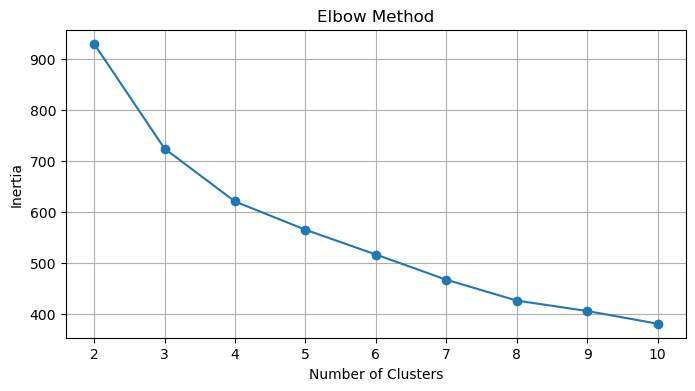

In [9]:
inertia = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(range(2, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

#### Elbow Method Summary
- Our plot is showing where the inertia slows down when increasing the number of clusters. We can see that around 4 or 5 clusters we get a slower decrease in inertia meaning less significance in increasing the number of clusters.
- I have decided to run our k-means algorithm with 4 clusters.

Now we can build our k-means clustering model with 4 clusters, however it is important to note that we can always go back and use 3 or 5 clusters as well.

In [10]:
#We already imported K-means in the beginning
#We are just using a simple kmeans clustering algorithm to start
kmeans = KMeans(n_clusters = 4, random_state=42)

kmeans.fit(df_scaled)

KMeans(n_clusters=4, random_state=42)

### Assign Cluster Labels to the Data

Now that we have fitted the K-means model to our data, the next step is to assign the cluster labels generated by the algorithm back to our original dataset. This will allow us to analyze which data points (e.g., countries) belong to which clusters.

We will add a new column to our dataset that contains the cluster label for each data point.


In [11]:
df_scaled['clusters'] = kmeans.labels_

### **Feature Selection and Importance Analysis**

#### **Objective:**
After performing K-means clustering and identifying the optimal number of clusters, the next step is to understand which features are most important in defining the clusters. This analysis will help us interpret the clusters more effectively and ensure that our visualizations and recommendations are based on the most relevant data.

#### **Approach:**
To determine the most important features, we will use a Random Forest classifier. We will train the Random Forest model to predict cluster labels based on the original features of the dataset.

In [12]:
X = df_scaled.drop('clusters', axis=1)
y = df_scaled['clusters']

In [13]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)


RandomForestClassifier(random_state=42)

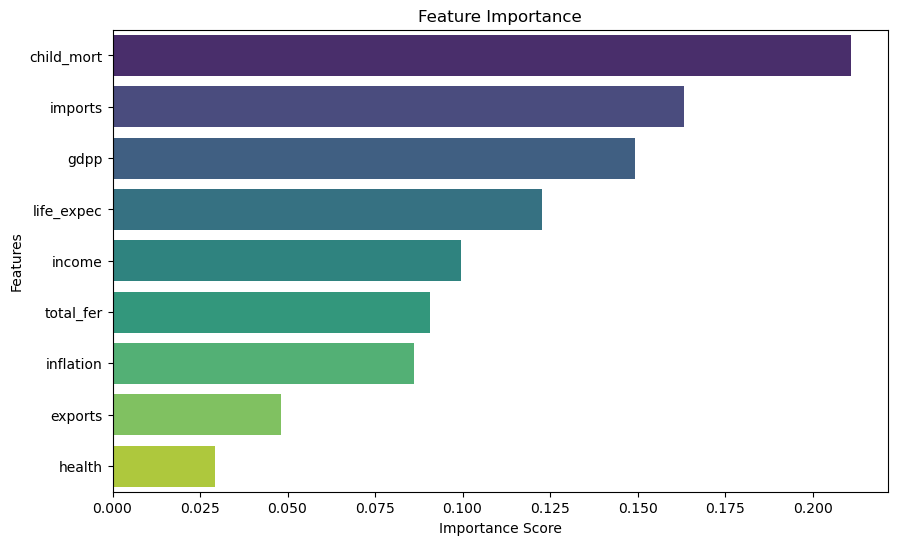

In [14]:
feature_importances = pd.Series(rf.feature_importances_, index=X.columns)

feature_importances = feature_importances.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_importances.index, palette="viridis")
plt.title('Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()


### **Feature Selection for Cluster Analysis**

#### **Objective:**
After performing K-means clustering and using a Random Forest classifier to assess feature importance, we identified the top three features that most strongly influence the clustering of our data. These features are crucial in defining the differences between clusters and will be the focus of our subsequent analysis and visualizations.

#### **Selected Features:**
The Random Forest model indicated that the following three features are the most important for determining the clusters:

1. **Child Mortality (`child_mort`):** This feature represents the number of deaths of children under five years of age per 1,000 live births. High importance suggests that child mortality rates vary significantly across clusters and play a key role in differentiating between them.

2. **Imports (`imports`):** This feature measures the percentage of GDP spent on imports. The variation in imports across clusters indicates different economic structures and trade dependencies among the groups.

3. **GDP per Capita (`gdpp`):** This feature represents the GDP per capita, calculated as the total GDP divided by the total population. It is a critical indicator of economic development and standard of living, with significant differences across clusters.

#### **Next Steps:**
These three features will be the focus of our analysis and visualizations as we seek to understand and interpret the clusters. By concentrating on `child_mort`, `imports`, and `gdpp`, we aim to gain deeper insights into the socio-economic characteristics that define each cluster. This will also guide us in making informed recommendations based on the clustering results.


### Visualize the Clusters

#### 2D/3D Visualization

To better understand the structure of the clusters, we will visualize them using scatter plots. Since we have already decided to focus on the three most important features, child_mort, imports, and gdpp, we don't have to worry about having too many features.

Visualizations can reveal patterns and relationships that might not be obvious from the numerical data alone.

#### Pair Plots

Pair plots allow us to visualize the relationships between multiple features across different clusters. 


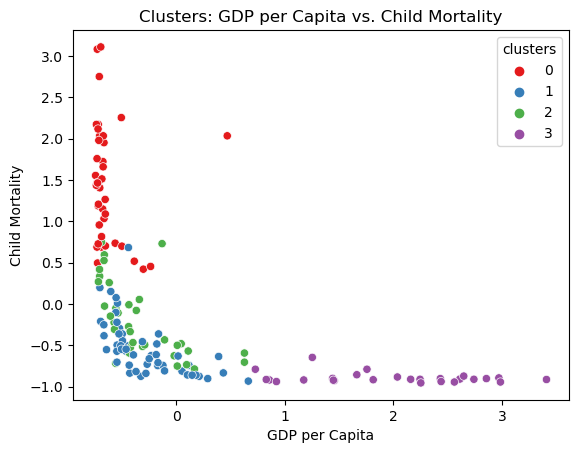

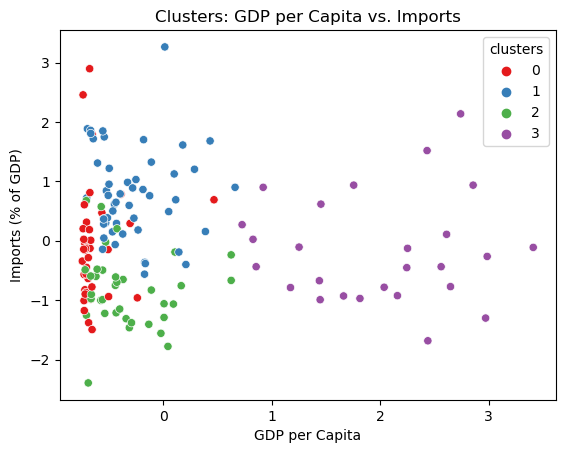

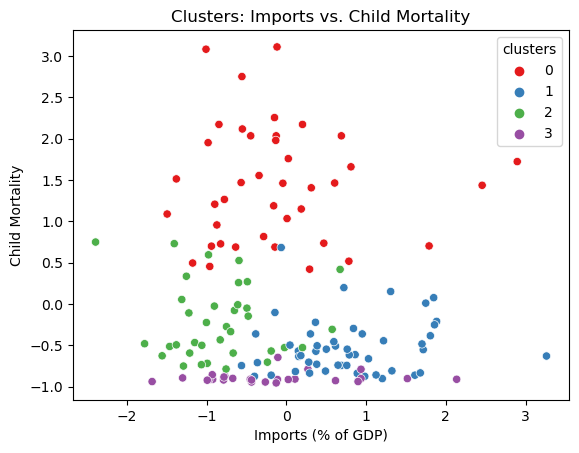

In [15]:
# Scatter plot of child_mort vs. gdpp
sns.scatterplot(x='gdpp', y='child_mort', hue='clusters', data=df_scaled, palette='Set1')
plt.title('Clusters: GDP per Capita vs. Child Mortality')
plt.xlabel('GDP per Capita')
plt.ylabel('Child Mortality')
plt.show()

# Scatter plot of imports vs. gdpp
sns.scatterplot(x='gdpp', y='imports', hue='clusters', data=df_scaled, palette='Set1')
plt.title('Clusters: GDP per Capita vs. Imports')
plt.xlabel('GDP per Capita')
plt.ylabel('Imports (% of GDP)')
plt.show()

# Scatter plot of child_mort vs. imports
sns.scatterplot(x='imports', y='child_mort', hue='clusters', data=df_scaled, palette='Set1')
plt.title('Clusters: Imports vs. Child Mortality')
plt.xlabel('Imports (% of GDP)')
plt.ylabel('Child Mortality')
plt.show()


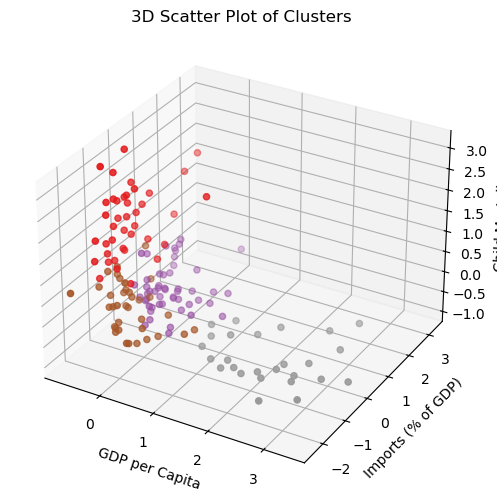

In [16]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_scaled['gdpp'], df_scaled['imports'], df_scaled['child_mort'], c=df_scaled['clusters'], cmap='Set1')
ax.set_xlabel('GDP per Capita')
ax.set_ylabel('Imports (% of GDP)')
ax.set_zlabel('Child Mortality')
plt.title('3D Scatter Plot of Clusters')
plt.show()


### **Evaluating the Quality of the Clusters**

#### **Objective:**
After selecting the top three features (`child_mort`, `imports`, and `gdpp`), it is important to evaluate how well the clusters are defined based on these features. A key metric for this evaluation is the Silhouette Score, which measures how similar each data point is to its own cluster compared to other clusters. A higher Silhouette Score indicates that the clusters are well-separated and cohesive.

#### **Silhouette Score Calculation:**
To assess the quality of the clusters, we will calculate the Silhouette Score using the selected features. This score will help us determine if the clustering is effective and whether the selected features are indeed capturing the differences between clusters.

The Silhouette Score ranges from -1 to 1:
- **Close to 1:** Data points are well-clustered and clearly distinguishable from other clusters.
- **Close to 0:** Data points are on or near the boundary between clusters.
- **Negative Values:** Data points may have been assigned to the wrong cluster.

#### **Steps:**
1. **Calculate the Silhouette Score:** We will compute the Silhouette Score using the selected features (`child_mort`, `imports`, `gdpp`).
2. **Interpret the Score:** A higher score suggests that the clusters are well-separated, meaning the selected features effectively differentiate the clusters. If the score is low, we may need to revisit our feature selection or clustering parameters.

By evaluating the Silhouette Score, we can validate the effectiveness of our clustering approach and ensure that our analysis is based on well-defined clusters.


In [17]:
# Calculate silhouette score using the selected features
silhouette_avg = silhouette_score(df_scaled[['gdpp', 'imports', 'child_mort']], df_scaled['clusters'])
print(f'Silhouette Score: {silhouette_avg:.2f}')


Silhouette Score: 0.32


### **Silhouette Score**

#### **Silhouette Score Evaluation:**
After evaluating the quality of the clusters using the Silhouette Score, we obtained a score of 0.32. While this score suggests that the clusters are moderately well-defined, it also indicates that there is some overlap between clusters and that the separation between them could be stronger.

#### **Decision to Proceed:**
Despite the moderate Silhouette Score, we have decided to proceed with the current clustering configuration for the following reasons:

1. **Interpretability:** The clusters, as currently defined by the selected features (`child_mort`, `imports`, `gdpp`), are interpretable and provide meaningful insights into the socio-economic characteristics of the groups.

2. **Actionable Insights:** The current clusters align with the objectives of the project, allowing us to make informed recommendations based on the analysis. The clusters still reflect distinct patterns in the data that are valuable for the analysis.

3. **Balance Between Complexity and Clarity:** While further optimization might improve the Silhouette Score, it could also complicate the model without necessarily adding significant value to the insights. We aim to balance model simplicity with the clarity of results.

4. **Exploratory Nature:** The primary goal of this analysis is exploratory. The clusters provide a useful framework for understanding the data, even if they are not perfectly separated.

#### **Next Steps:**
We will continue with the analysis and interpretation of the clusters, focusing on the selected features. The insights gained from these clusters will be used to make recommendations and guide further exploration.

By proceeding with the current clustering configuration, we aim to maintain the focus on actionable and interpretable results, while acknowledging the limitations indicated by the Silhouette Score.


In [18]:
centroid_columns = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']

centroids = pd.DataFrame(kmeans.cluster_centers_, columns=centroid_columns)

selected_centroids = centroids[['child_mort', 'imports', 'gdpp']]

print("Centroids for selected features (child_mort, imports, gdpp):\n", selected_centroids)

Centroids for selected features (child_mort, imports, gdpp):
    child_mort   imports      gdpp
0    1.450316 -0.122282 -0.632246
1   -0.531995  0.769568 -0.285451
2   -0.212301 -0.834643 -0.328946
3   -0.893771 -0.165751  1.988072


### **Cluster Interpretation Based on Selected Features**

#### **Overview:**
The clusters have been analyzed based on three key features: `child_mort` (child mortality rate), `imports` (percentage of GDP spent on imports), and `gdpp` (GDP per capita). The centroids of each cluster represent the average values of these features for the countries within that cluster. Below is an interpretation of what each cluster represents.

#### **Cluster 0:**
- **Child Mortality (`child_mort`):** High (1.450316)
- **Imports (`imports`):** Slightly Below Average (-0.122282)
- **GDP per Capita (`gdpp`):** Below Average (-0.632246)
  
**Interpretation:**
Cluster 0 likely represents countries with high child mortality rates, indicating significant health challenges. These countries have slightly below-average imports and GDP per capita, suggesting economic challenges but not necessarily a heavy reliance on imports. The high child mortality indicates that these countries may be in need of substantial health interventions and economic support.

#### **Cluster 1:**
- **Child Mortality (`child_mort`):** Below Average (-0.531995)
- **Imports (`imports`):** Above Average (0.769568)
- **GDP per Capita (`gdpp`):** Slightly Below Average (-0.285451)
  
**Interpretation:**
Cluster 1 represents countries with below-average child mortality rates, suggesting relatively better health outcomes compared to other clusters. However, these countries have above-average imports, indicating a higher reliance on foreign goods and services. The GDP per capita is slightly below average, which may point to a moderate economic development level with a potential vulnerability due to high import dependence.

#### **Cluster 2:**
- **Child Mortality (`child_mort`):** Slightly Below Average (-0.212301)
- **Imports (`imports`):** Low (-0.834463)
- **GDP per Capita (`gdpp`):** Below Average (-0.328946)
  
**Interpretation:**
Cluster 2 likely includes countries with slightly below-average child mortality rates and a low percentage of GDP spent on imports. This could indicate more self-sufficient economies with lower external dependencies. However, the GDP per capita is below average, suggesting these countries might still face economic challenges despite having better health outcomes and lower import reliance.

#### **Cluster 3:**
- **Child Mortality (`child_mort`):** Low (-0.893771)
- **Imports (`imports`):** Slightly Below Average (-0.165751)
- **GDP per Capita (`gdpp`):** High (1.988072)
  
**Interpretation:**
Cluster 3 represents the most developed countries in this analysis, characterized by low child mortality rates and high GDP per capita. These countries have slightly below-average imports, indicating a balanced or self-sufficient economy. The low child mortality and high GDP per capita suggest strong health systems and economic prosperity, making this cluster the most stable and well-off among the groups.

### **Conclusion:**
The clusters reveal a range of socio-economic conditions among the countries analyzed. Cluster 3 stands out as the most developed and prosperous, while Cluster 0 highlights countries with significant health and economic challenges. Clusters 1 and 2 represent countries with varying degrees of economic development and reliance on imports. These insights can be used to guide strategic decisions, such as targeting aid or resources to the clusters that are most in need.


### **Key Insights**

1. **Cluster 0:** Represents countries with significant health challenges and below-average economic performance, indicating a need for both health and economic support.
2. **Cluster 3:** Represents the most developed countries, with strong economic performance and low child mortality rates, suggesting these countries are stable and less in need of aid.
3. **Cluster 1 and 2:** Show varying degrees of economic development and reliance on imports, with Cluster 1 being more import-reliant despite slightly better health outcomes.

These insights provide a foundation for prioritizing countries for aid and interventions based on their socio-economic profiles.


### **Recommendations**

Based on the cluster analysis and the insights gained from the selected features (`child_mort`, `imports`, and `gdpp`), here are my recommendations:

1. **Focus on Cluster 0 for Health and Economic Aid:**
   - **Rationale:** Cluster 0 is characterized by high child mortality rates and below-average GDP per capita, indicating significant socio-economic challenges. These countries should be prioritized for immediate health and economic support to address both the high mortality rates and the underlying economic issues.

2. **Engage Cluster 3 Countries as Partners:**
   - **Rationale:** Cluster 3 represents the most developed countries, with low child mortality and high GDP per capita. These countries could be valuable partners in global aid initiatives, providing financial and technical support to less developed regions, particularly those in Cluster 0.

3. **Further Analysis on Cluster 1 and 2:**
   - **Rationale:** Clusters 1 and 2 show varying degrees of economic development and reliance on imports. Further analysis could explore the specific challenges and opportunities within these clusters, particularly focusing on their import reliance and economic stability. This analysis could help tailor more specific interventions for these countries.


### **Creating a Dendrogram for Hierarchical Clustering**

#### **Rationale:**
While K-means clustering is a powerful method for grouping countries based on socio-economic and health indicators, it has limitations in terms of understanding the hierarchical relationships between clusters. To complement the K-means analysis and gain a deeper understanding of how the countries are related, we will create a dendrogram using hierarchical clustering.

A dendrogram is a tree-like diagram that illustrates the arrangement of clusters produced by hierarchical clustering. This visual tool provides several key insights:

- **Hierarchical Relationships:** Unlike K-means, which partitions the data into a flat structure of clusters, hierarchical clustering allows us to see how clusters form at various levels of similarity. The dendrogram will help us understand how closely related different clusters are and how they merge into larger clusters as the threshold for similarity decreases.

- **Determining the Optimal Number of Clusters:** The dendrogram can suggest the natural number of clusters in the data by showing where significant merges occur. This can guide the selection of the number of clusters for methods like K-means, ensuring that the chosen number aligns with the natural structure of the data.

- **Exploring Sub-Clusters:** The dendrogram can reveal sub-clusters within the main clusters identified by K-means. These sub-clusters may represent important nuances in the data that are not captured by flat clustering methods.

Given these advantages, creating a dendrogram will provide a valuable hierarchical perspective on the data, allowing us to refine our clustering approach and enhance the overall analysis.


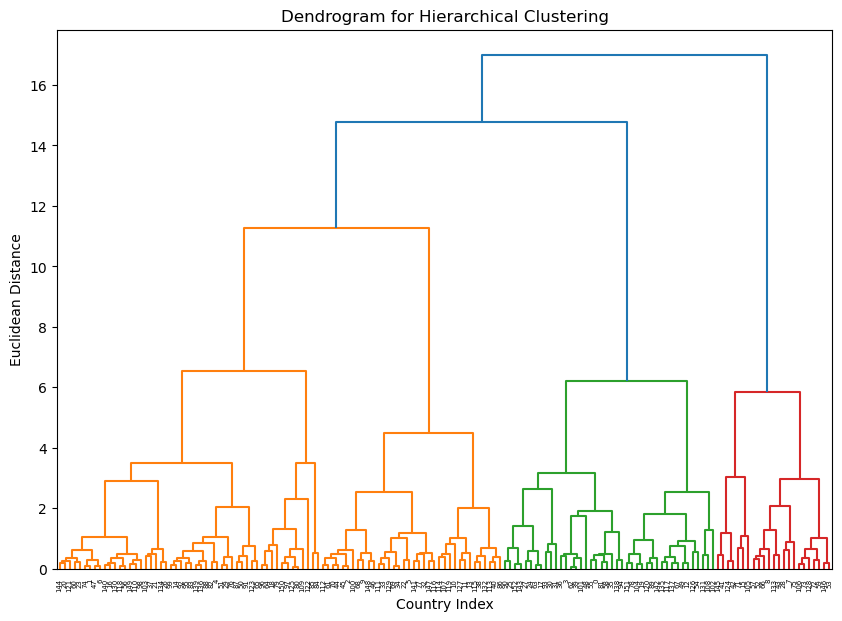

In [19]:
# Perform hierarchical/agglomerative clustering
linked = linkage(df_scaled[['child_mort', 'imports', 'gdpp']], method='ward')

# Create the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked,
           orientation='top',
           labels=df_scaled.index.tolist(),
           distance_sort='descending',
           show_leaf_counts=True)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Country Index')
plt.ylabel('Euclidean Distance')
plt.show()


### **Revisiting K-means Clustering with Three Clusters**

#### **Rationale:**
After analyzing the dendrogram produced by hierarchical clustering, it became evident that the data naturally groups into three distinct clusters. The dendrogram shows that the countries can be divided into three main clusters with clear hierarchical relationships. This observation suggests that a K-means clustering solution with three clusters might better align with the inherent structure of the data.

Previously, K-means clustering was performed with four clusters. However, based on the insights from the dendrogram, reducing the number of clusters to three could lead to more coherent and interpretable clusters. By aligning the K-means clustering process with the hierarchical structure suggested by the dendrogram, we aim to:

- **Improve Cluster Coherence:** A three-cluster solution might result in clusters that are more internally cohesive and well-separated from each other.
- **Simplify Interpretation:** Fewer clusters can make it easier to interpret and explain the results, particularly if the clusters represent clear and distinct socio-economic groups.

Therefore, K-means clustering will be re-run with three clusters to determine if this approach yields better-defined clusters and more meaningful insights.


In [20]:
# Re-run K-means with 3 clusters
kmeans_3 = KMeans(n_clusters=3, random_state=42)
kmeans_3.fit(df_scaled[['child_mort', 'imports', 'gdpp']])

# Assign the new cluster labels to the data
df_scaled['cluster_3'] = kmeans_3.labels_

# Print the cluster centroids for three clusters
centroids_3 = pd.DataFrame(kmeans_3.cluster_centers_, columns=['child_mort', 'imports', 'gdpp'])
print("Centroids for three clusters:\n", centroids_3)

# Calculate the Silhouette Score for the 3-cluster solution to compare to our previous silhouette score with 4 clusters
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(df_scaled[['child_mort', 'imports', 'gdpp']], df_scaled['cluster_3'])
print(f'Silhouette Score for 3 clusters: {silhouette_avg:.2f}')

Centroids for three clusters:
    child_mort   imports      gdpp
0    0.720845 -0.643986 -0.514190
1   -0.877214 -0.245574  1.972853
2   -0.444236  0.850440 -0.276767
Silhouette Score for 3 clusters: 0.39


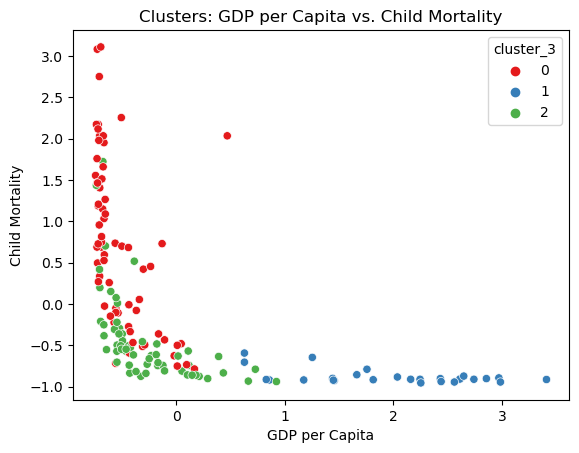

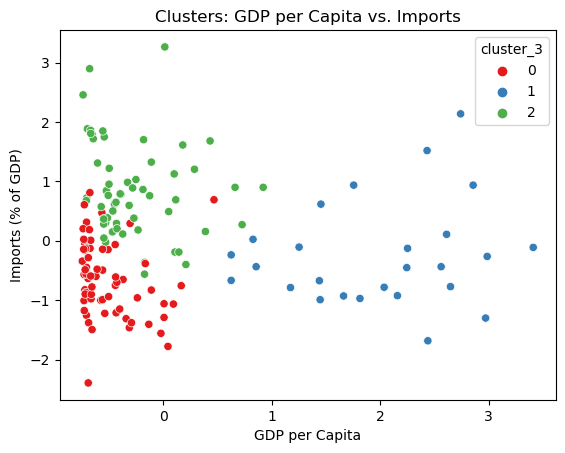

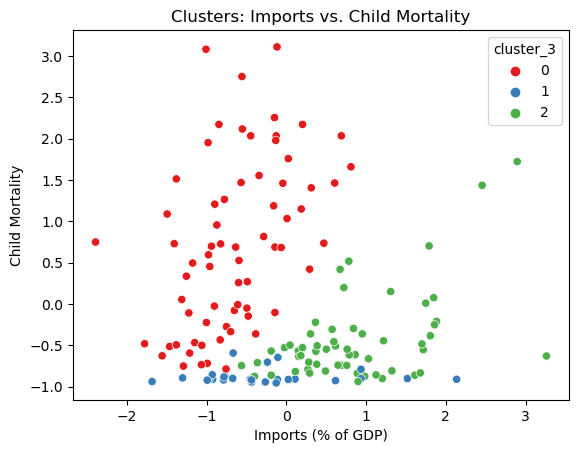

In [21]:
# Scatter plot of child_mort vs. gdpp
sns.scatterplot(x='gdpp', y='child_mort', hue='cluster_3', data=df_scaled, palette='Set1')
plt.title('Clusters: GDP per Capita vs. Child Mortality')
plt.xlabel('GDP per Capita')
plt.ylabel('Child Mortality')
plt.show()

# Scatter plot of imports vs. gdpp
sns.scatterplot(x='gdpp', y='imports', hue='cluster_3', data=df_scaled, palette='Set1')
plt.title('Clusters: GDP per Capita vs. Imports')
plt.xlabel('GDP per Capita')
plt.ylabel('Imports (% of GDP)')
plt.show()

# Scatter plot of child_mort vs. imports
sns.scatterplot(x='imports', y='child_mort', hue='cluster_3', data=df_scaled, palette='Set1')
plt.title('Clusters: Imports vs. Child Mortality')
plt.xlabel('Imports (% of GDP)')
plt.ylabel('Child Mortality')
plt.show()

### **Interpretation of Clusters Based on Three-Cluster Solution and Selected Features**

After re-running the K-means clustering algorithm with three clusters we can see that the silhouette score is moderately better than our previous four cluster solution showing better division between the different clusters. Below is a detailed interpretation of what each cluster represents:

#### **Cluster 0:**
- **Child Mortality (`child_mort`):** Above Average (0.720845)
- **Imports (`imports`):** Below Average (-0.643986)
- **GDP per Capita (`gdpp`):** Below Average (-0.514190)

**Interpretation:**
Cluster 0 consists of countries with higher-than-average child mortality rates and lower-than-average GDP per capita. These countries also have a lower reliance on imports relative to their GDP. This cluster likely represents countries that are facing significant health challenges and economic difficulties. The low import percentage might indicate a more self-sufficient economy, but it could also suggest limited access to international markets.

#### **Cluster 1:**
- **Child Mortality (`child_mort`):** Below Average (-0.877214)
- **Imports (`imports`):** Slightly Below Average (-0.245574)
- **GDP per Capita (`gdpp`):** Above Average (1.972853)

**Interpretation:**
Cluster 1 represents the most developed countries in this analysis, characterized by low child mortality rates and high GDP per capita. These countries have slightly below-average imports as a percentage of GDP, which might indicate a balanced or self-sufficient economy. This cluster likely includes economically prosperous countries with strong health outcomes and relatively stable trade relations.

#### **Cluster 2:**
- **Child Mortality (`child_mort`):** Moderately Below Average (-0.444236)
- **Imports (`imports`):** Above Average (0.850440)
- **GDP per Capita (`gdpp`):** Slightly Below Average (-0.276767)

**Interpretation:**
Cluster 2 consists of countries with moderately lower child mortality rates but also a higher reliance on imports relative to their GDP. The GDP per capita is slightly below average, indicating that these countries might have moderate economic development but are vulnerable due to their dependency on imports. This cluster could represent countries that are on the path to development but are still facing challenges in terms of economic stability and self-sufficiency.

### **Recommendations Based on Three-Cluster Solution**

Based on the interpretation of the three clusters, the following recommendations are proposed:

1. **Prioritize Aid for Cluster 0:**
   - **Rationale:** Cluster 0 consists of countries with high child mortality rates and low GDP per capita. These countries are likely to be the most vulnerable, with significant health and economic challenges. Aid efforts should focus on improving healthcare systems to reduce child mortality and on boosting economic development to enhance the overall well-being of these countries.

2. **Leverage Cluster 1 Countries as Partners:**
   - **Rationale:** Cluster 1 includes economically developed countries with strong health outcomes. These countries are well-positioned to support global development initiatives. Engaging these countries as partners in aid programs could amplify the impact of interventions in less developed regions, particularly those in Cluster 0.

3. **Support Economic Stability in Cluster 2:**
   - **Rationale:** Cluster 2 countries, while having lower child mortality rates, show a high reliance on imports and slightly below-average GDP per capita. These countries would benefit from initiatives aimed at enhancing economic stability, reducing import dependency, and fostering sustainable development. Support in these areas could help these countries strengthen their economies and reduce their vulnerabilities.

### **Conclusion**

This project aimed to categorize countries based on key socio-economic and health indicators, specifically focusing on `child_mort` (child mortality), `imports` (percentage of GDP spent on imports), and `gdpp` (GDP per capita). Through the application of K-means clustering, we explored both a four-cluster and a three-cluster solution to determine which approach best aligns with the natural structure of the data and provides the most actionable insights.

#### **Four-Cluster Solution:**
The initial analysis using four clusters provided a nuanced view of the data, identifying distinct groups of countries with varying levels of development and health outcomes. Each of the four clusters revealed specific socio-economic profiles:

- **Cluster 0:** High child mortality and low GDP per capita, suggesting countries with significant health and economic challenges.
- **Cluster 1:** Below-average child mortality but high import reliance, indicating moderate economic development with potential vulnerabilities.
- **Cluster 2:** Slightly below-average child mortality and low imports, representing self-sufficient economies with some economic challenges.
- **Cluster 3:** Low child mortality and high GDP per capita, representing the most developed and economically stable countries.

While the four-cluster solution offered detailed insights, it also introduced some complexity in interpretation, particularly with clusters that had overlapping characteristics.

#### **Three-Cluster Solution:**
This solution aligned more closely with the natural hierarchical structure of the data, simplifying the interpretation while still capturing key distinctions between countries:

- **Cluster 0:** Countries with high child mortality and low GDP per capita, indicating a need for focused health and economic interventions.
- **Cluster 1:** Economically developed countries with low child mortality, positioned as potential partners in global development efforts.
- **Cluster 2:** Countries with moderate development but high import reliance, requiring support to enhance economic stability and reduce vulnerabilities.

The improved Silhouette Score of 0.39 suggests that this configuration better captures the underlying structure of the data compared to the four-cluster solution.

#### **Final Recommendation:**
Based on the analysis, the three-cluster solution offers a balanced approach that simplifies the interpretation without losing the essential distinctions between groups of countries. This solution allows for clearer, more targeted recommendations:

- **Prioritize Cluster 0 for aid interventions** focusing on health and economic development.
- **Engage Cluster 1 countries as partners** in global development initiatives.
- **Support Cluster 2 countries** in enhancing economic stability and reducing import dependency.

By adopting the three-cluster solution, HELP International can more effectively allocate resources and design interventions that address the specific needs of different groups of countries, ultimately contributing to more equitable and impactful global development outcomes.
global development outcomes.

